In [492]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import fft
from scipy.ndimage import correlate
import pandas as pd

import scipy.ndimage

In [495]:
# Load the ECG data from `project_ecg_part1_signal_missing_value.csv` using pandas 
file = 'project_ecg_part1_signal_missing_value.csv'
data = pd.read_csv(file)

In [497]:
#show the first five rows
data.head()

,Amp,t
0,57.000000,0.000
1,532.528258,0.001
2,350.892626,0.002
3,-236.892626,0.003
4,-418.528258,0.004


In [499]:
x=data['Amp'].values
t=data['t'].values

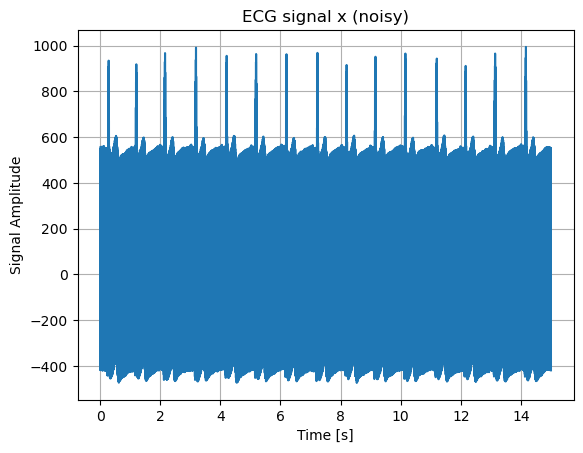

In [501]:
#plot the ecg signal x

plt.plot(t, x)
plt.title('ECG signal x (noisy)')
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude')
plt.grid()
plt.show()


In [503]:
#obtain the sampling interval
sampling_interval = t[1] - t[0]  
print("the sampling interval is", sampling_interval, "seconds")

the sampling interval is 0.001 seconds


In [505]:
#obtain the sampling frequency
sampling_frequency = 1 / sampling_interval
print("the sampling frequency is", sampling_frequency, "Hz")

the sampling frequency is 1000.0 Hz


In [508]:
#check missing values using data_frame_name.isnull().sum()
data.isnull().sum()

Amp    5
t      0
dtype: int64

The above results show that there are five missing values in the column `Amp`

In [511]:
#use interpolate function in pandas to replace the missing values with estimations
data = data.interpolate()

In [513]:
#check missing values again
data.isnull().sum()

Amp    0
t      0
dtype: int64

The above results show that there is no mising value

In [516]:
#get the signal x from data and convert it to a numpy array
x=data['Amp'].values

In [518]:
type(x)

numpy.ndarray

In [520]:
x.dtype

dtype('float64')

In [523]:
#apply fft to x and obtain the spectrum X
#compute the absolute value of X, name it X_abs
#obtain frequencies using fftfreq, name it freqs
X = np.fft.fft(x,norm='forward')
X_abs = np.abs(X)
freqs = np.fft.fftfreq(len(x), d=sampling_interval)


(0.0, 300.0)

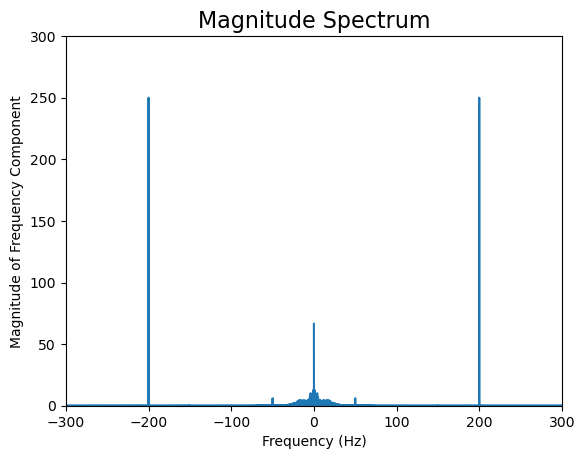

In [525]:
#plot freqs vs X_abs

fig, ax = plt.subplots()
ax.plot(freqs, X_abs)
plt.title('Magnitude Spectrum', fontsize=16)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude of Frequency Component')

ax.set_xlim(-300,300)
ax.set_ylim(0, 300)


In [528]:
X[np.logical_or(freqs < -100, freqs > 100)] = 0

In [530]:
#recompute the absolute value of X, name it X_abs
X_abs = np.abs(X)

(0.0, 300.0)

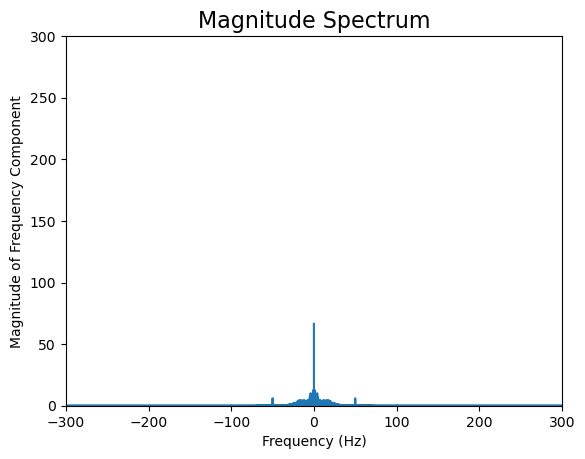

In [532]:
#plot freqs vs X_abs
fig, ax = plt.subplots()
ax.plot(freqs, X_abs)
plt.title('Magnitude Spectrum', fontsize=16)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude of Frequency Component')

ax.set_xlim(-300,300)
ax.set_ylim(0, 300)

In [534]:
#apply the inverse fourier transform to X, and obtain x_clean
x_clean = np.fft.ifft(X)

In [536]:
#we only need the real part
x_clean=x_clean.real

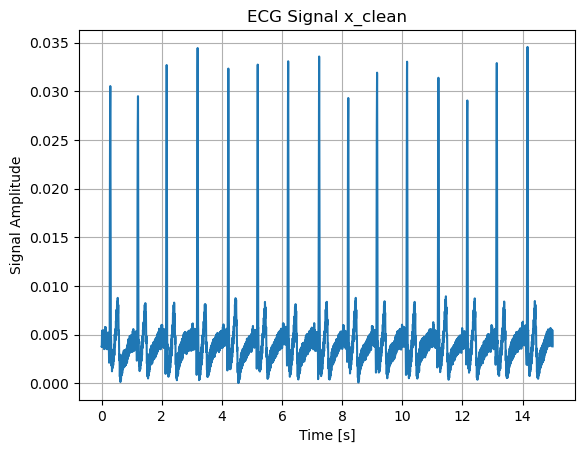

In [538]:
#plot the signal x_clean
fig, ax = plt.subplots()
plt.plot(t[:len(x_clean)], x_clean)  
plt.title('ECG Signal x_clean')
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude')
plt.grid()

In [541]:
#peak detection
h1 = np.array([-1, 1, 0]) 
h2 = np.array([0, 1, -1])   
y = scipy.ndimage.correlate(x_clean, h1, mode='nearest')
z = scipy.ndimage.correlate(x_clean, h2, mode='nearest')
PeakIndexArray = np.where((y > 0) & (z > 0))[0]


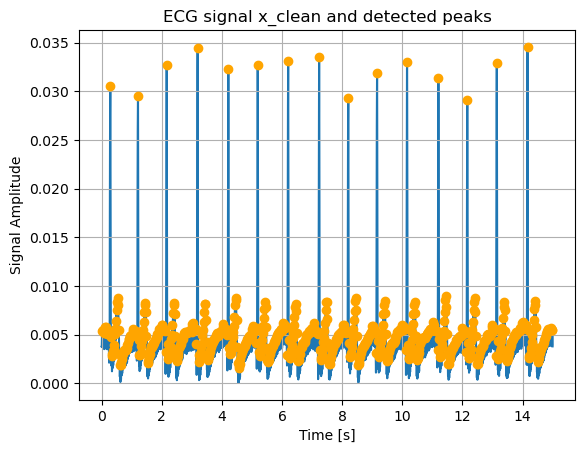

In [543]:
#plot the detected peaks and x_clean
fig, ax = plt.subplots()
plt.plot(t[:len(x_clean)], x_clean, zorder=1)
plt.scatter(t[PeakIndexArray], x_clean[PeakIndexArray], color='orange', zorder=2)

plt.title('ECG signal x_clean and detected peaks')
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude')
plt.grid()



In [546]:
#estimate the threshold
detected_peaks = x_clean[PeakIndexArray]
percentile_threshold = 98 
threshold = np.percentile(detected_peaks, percentile_threshold)
print('threshold is', threshold)

threshold is 0.018200874093302573


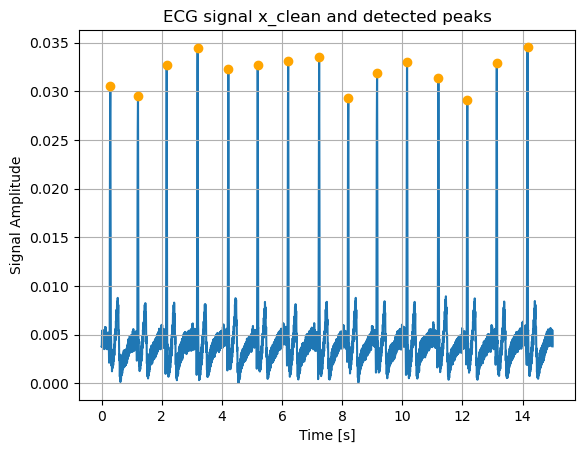

In [548]:
#obtain the R-peaks by removing the peaks lower than the threshold
#RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x_clean
#plot the R-peaks and x_clean

RPeakIndexArray = PeakIndexArray[detected_peaks > threshold]

fig, ax = plt.subplots()
plt.plot(t[:len(x_clean)], x_clean, zorder=1)
plt.scatter(t[RPeakIndexArray], x_clean[RPeakIndexArray], color='orange', zorder=2)
plt.title('ECG signal x_clean and detected peaks')
plt.xlabel('Time [s]')
plt.ylabel('Signal Amplitude')
plt.grid()



(0.0, 100.0)

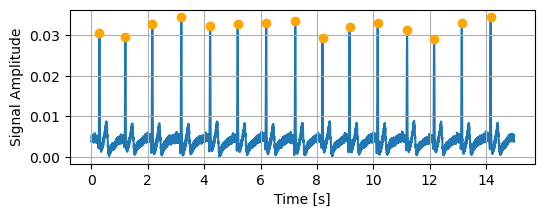

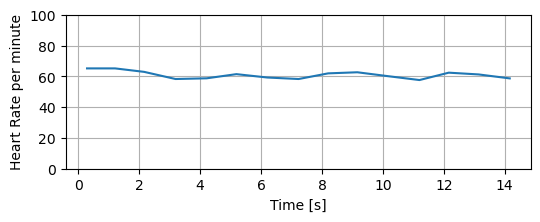

In [557]:
# RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x_clean
#create a numpy array HeartRate that has the same shape as RPeakIndexArray
# for loop
# plot the signal x_clean and the HeartRate curve


HeartRate = np.zeros(RPeakIndexArray.shape)
for n in range(1, RPeakIndexArray.shape[0]):
    HeartRate[n] = 60 * sampling_frequency / (RPeakIndexArray[n] - RPeakIndexArray[n - 1])
HeartRate[0] = HeartRate[1]

fig1, ax1 = plt.subplots(figsize=(6, 2))
ax1.plot(t[:len(x_clean)], x_clean, zorder=1)
ax1.scatter(t[RPeakIndexArray], x_clean[RPeakIndexArray], color='orange', zorder=2,)
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Signal Amplitude')
ax1.grid()




fig2, ax2 = plt.subplots(figsize=(6, 2))
ax2.plot(t[RPeakIndexArray], HeartRate)
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Heart Rate per minute')
ax2.grid()
ax2.set_ylim(0, 100)
